In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [32]:
data = pd.read_csv('dataset.csv', sep=';')
data.dropna(subset=['Viklingstemperatur L1 [°C]', 'Kjøling varmluft ut [°C]'], inplace=True)
#train, temp_test = train_test_split(data, test_size=0.30, random_state=42, shuffle=False)
#validation, test = train_test_split(temp_test, test_size=0.50, random_state=42, shuffle=False)

train_size = int(len(data) * 0.70)
val_size = int(len(data) * 0.15)
test_size = len(data) - train_size - val_size

train = data.iloc[:train_size]
validation = data.iloc[train_size:train_size + val_size]
test = data.iloc[train_size + val_size:]

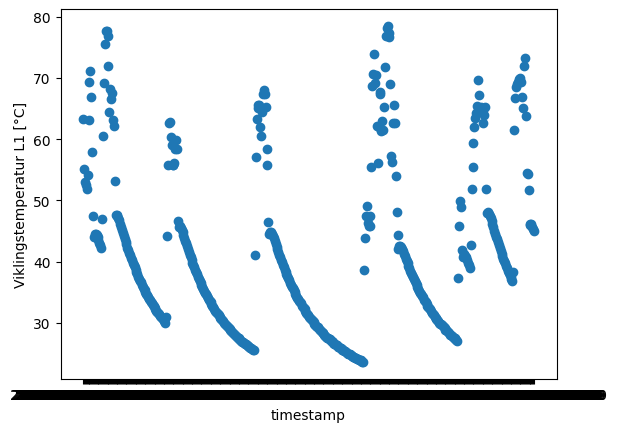

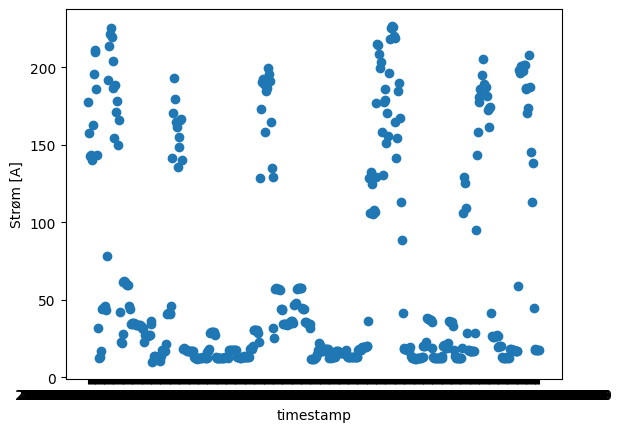

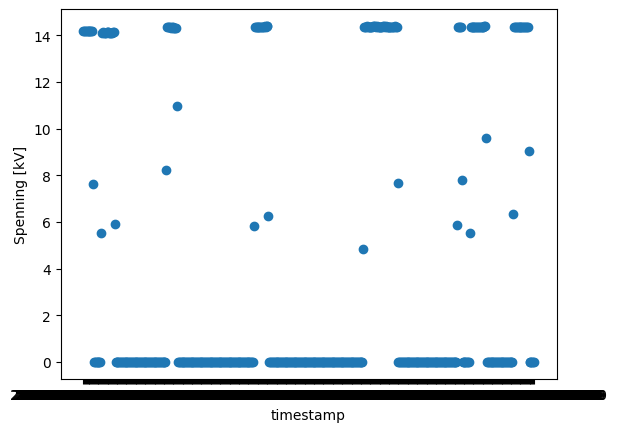

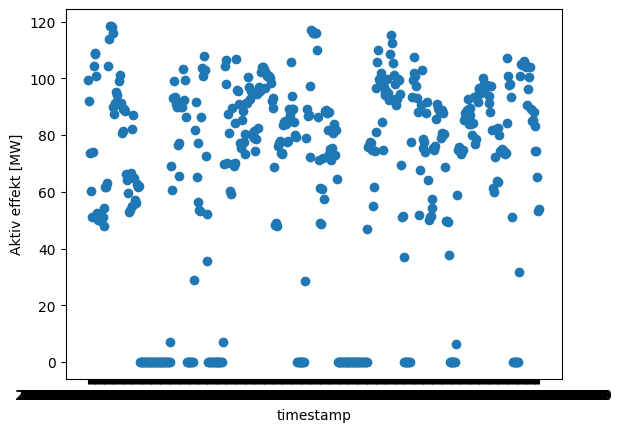

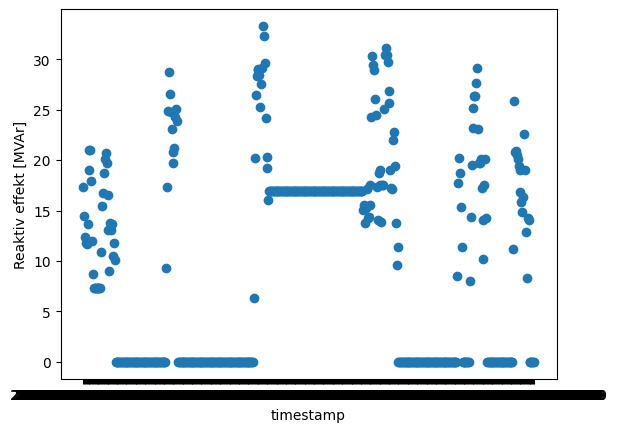

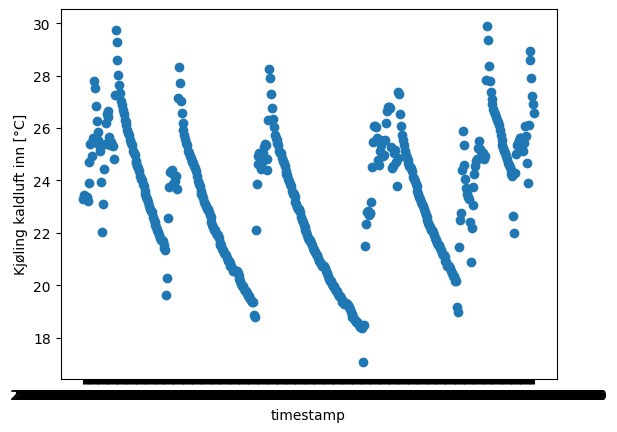

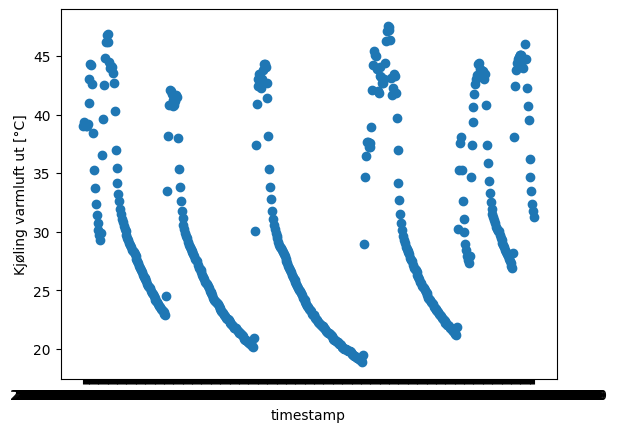

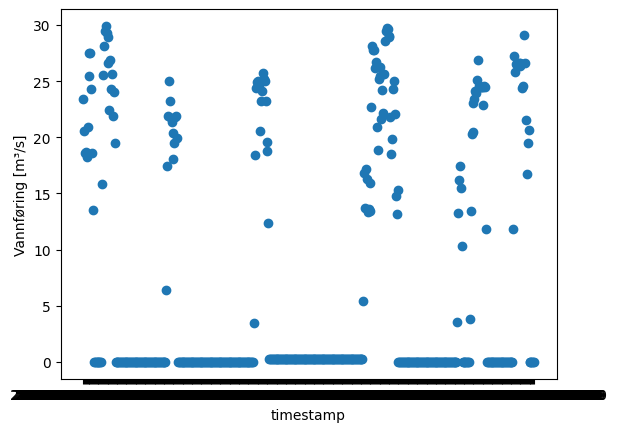

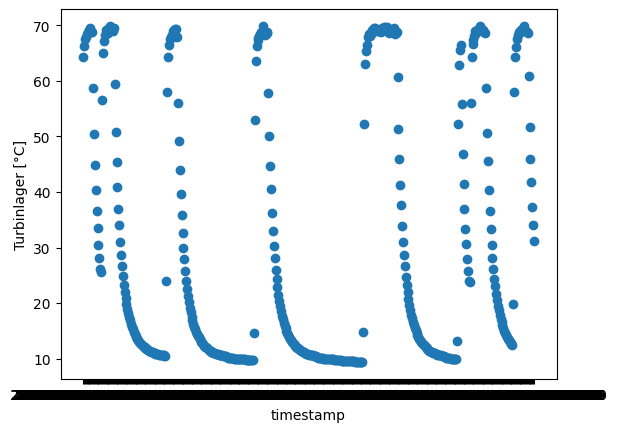

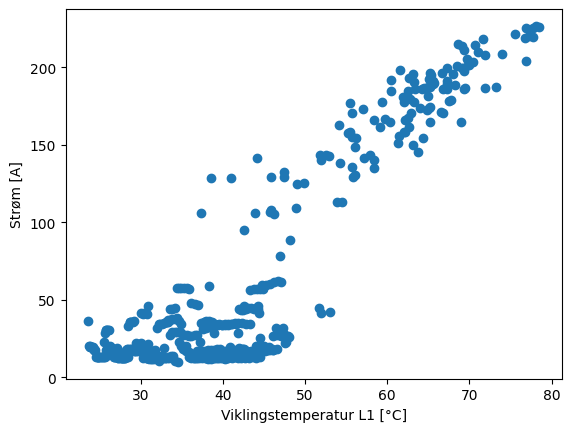

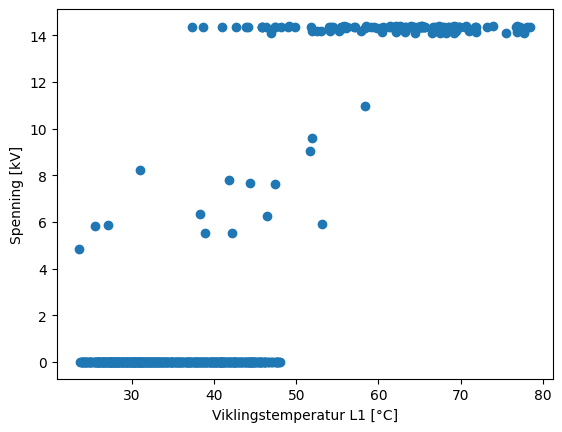

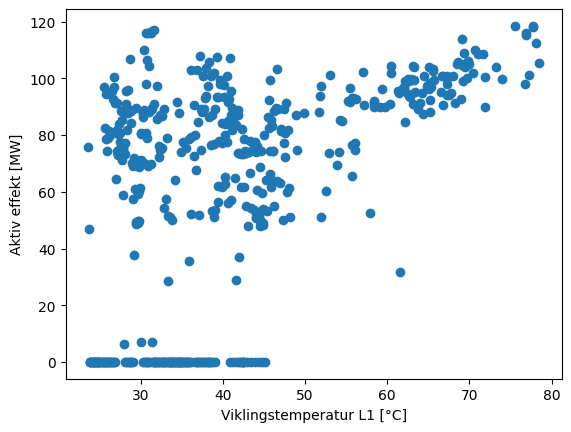

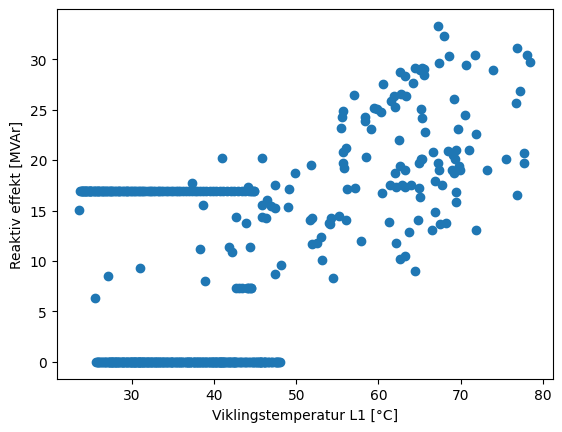

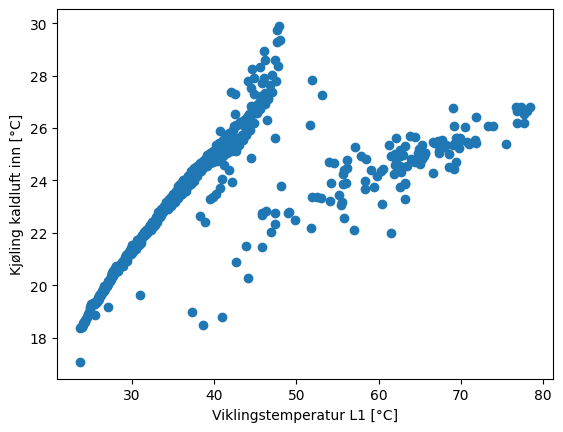

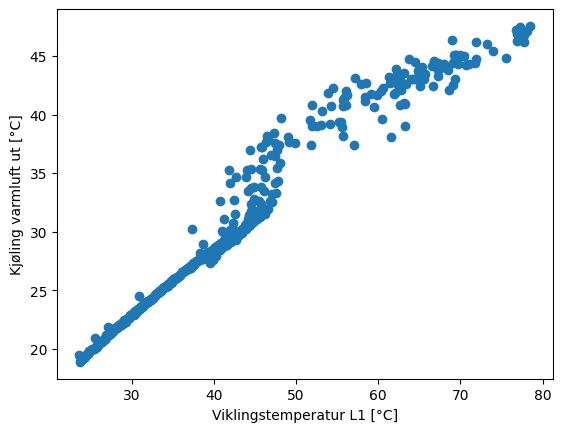

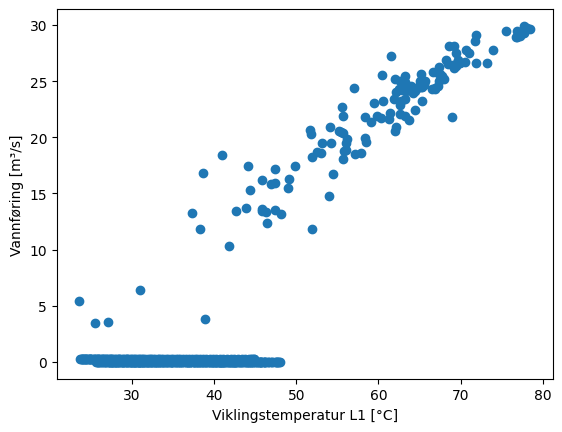

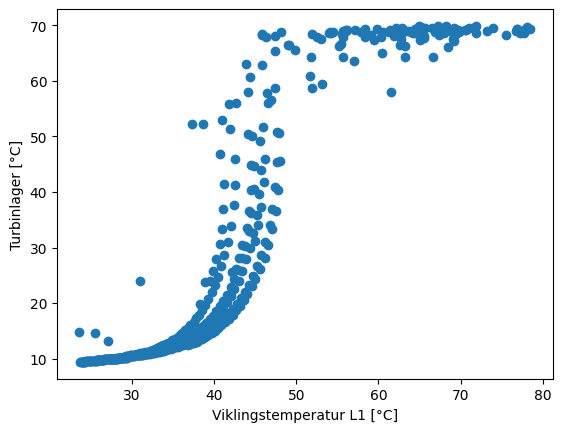

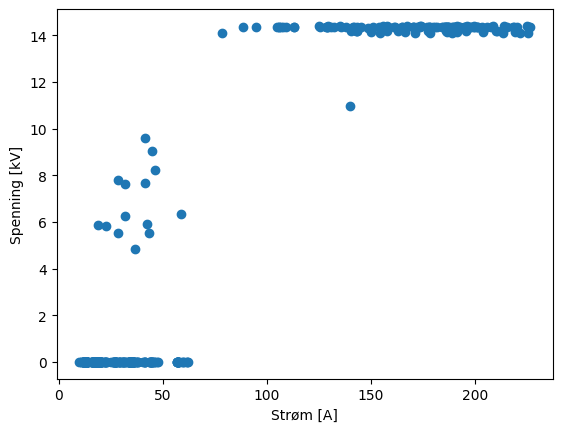

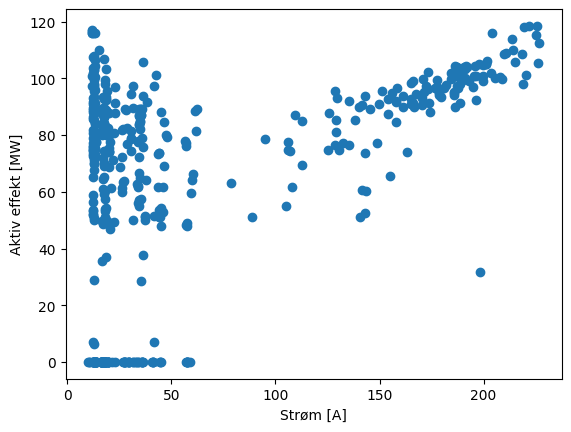

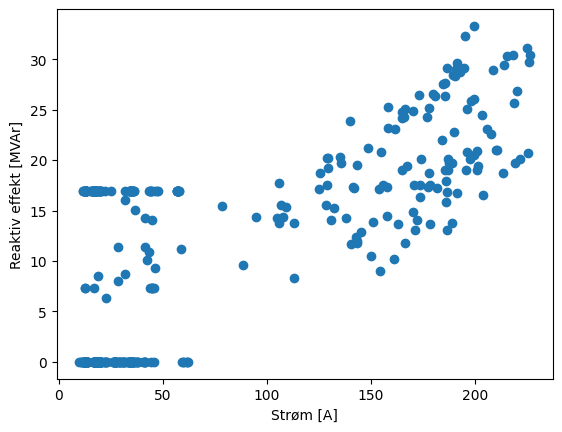

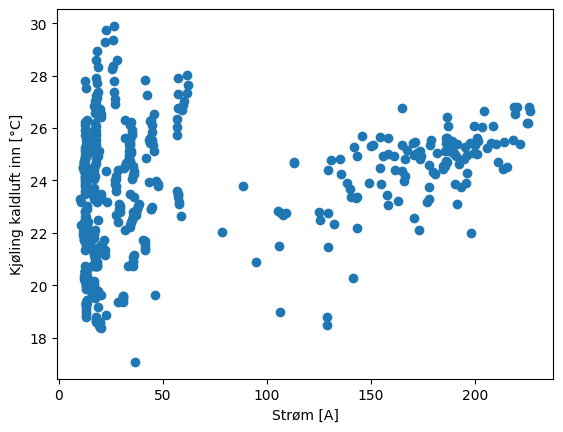

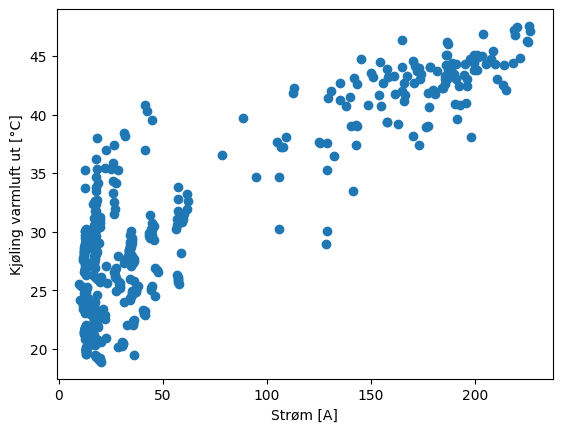

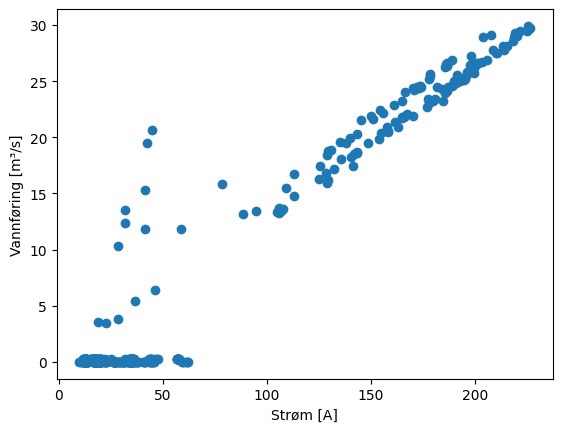

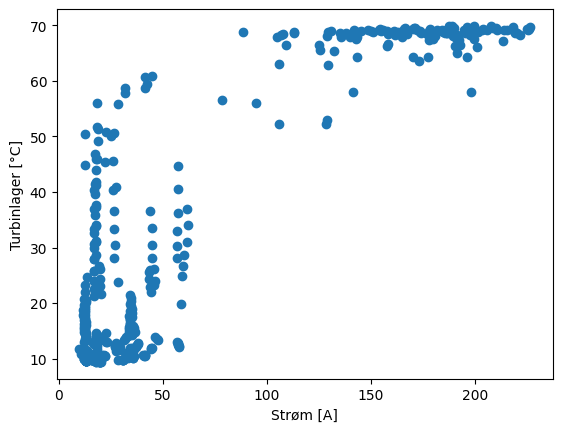

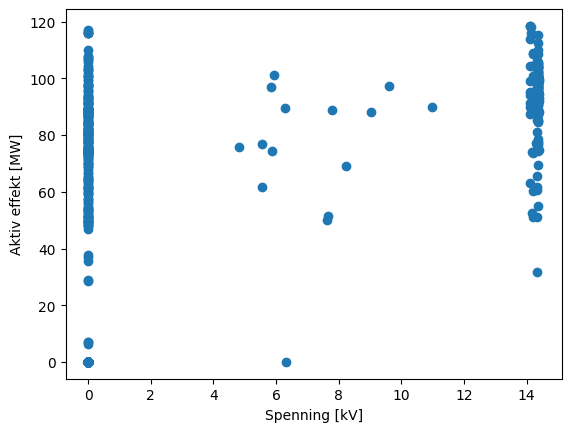

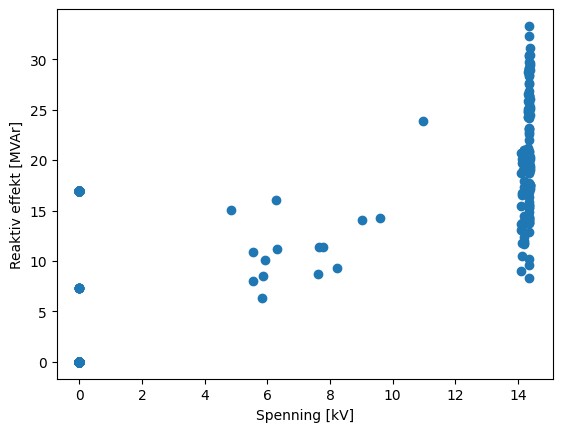

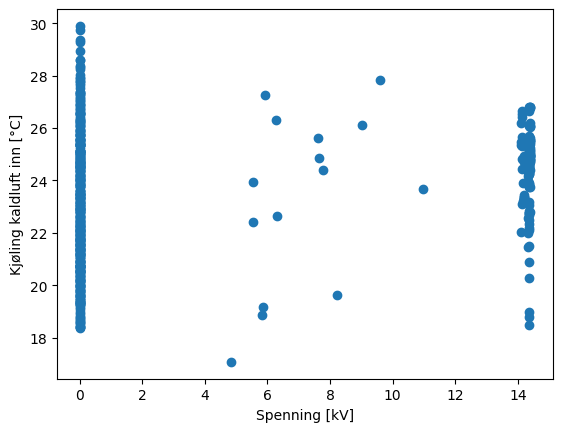

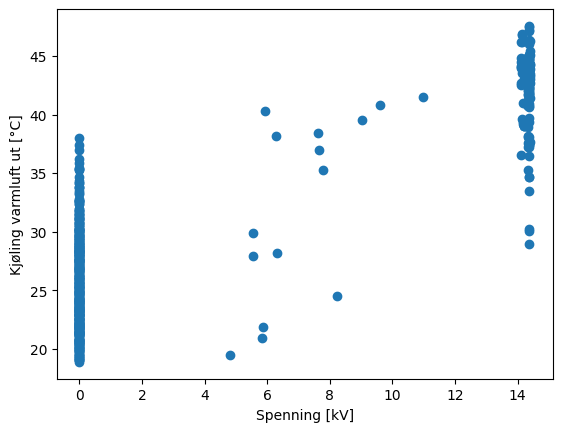

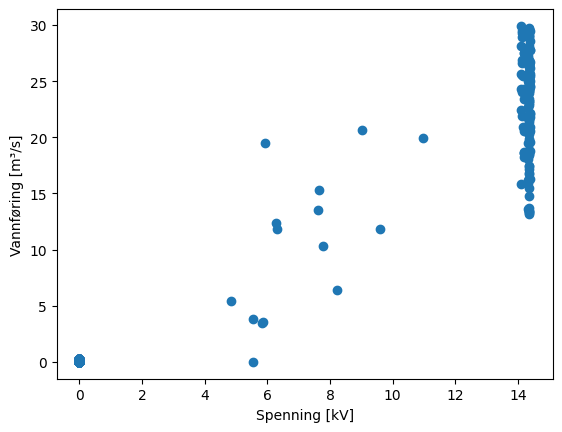

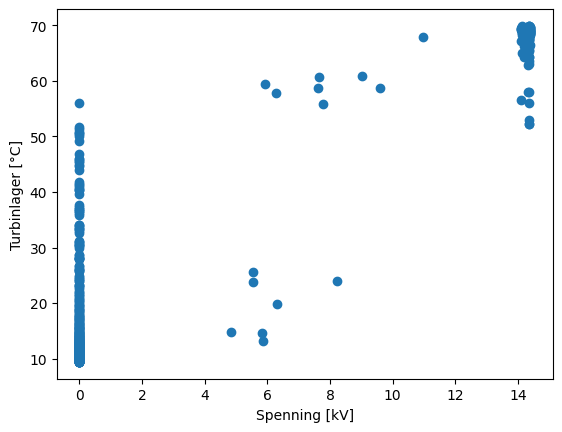

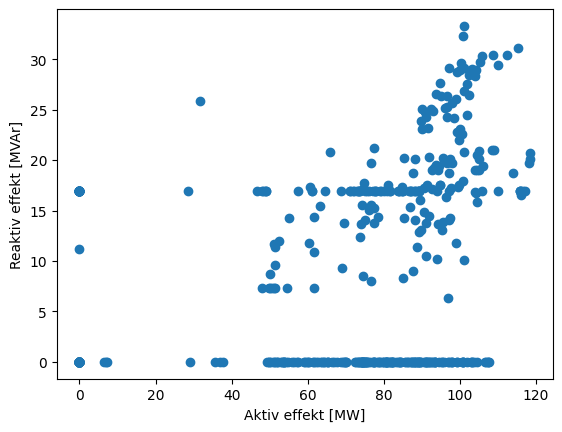

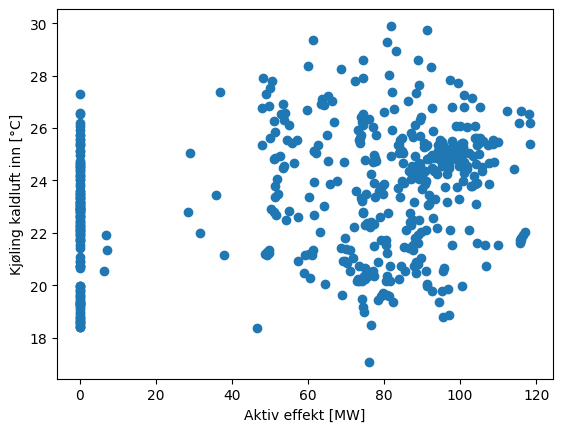

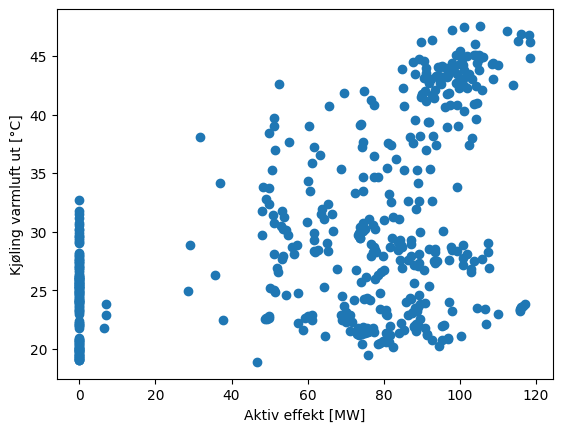

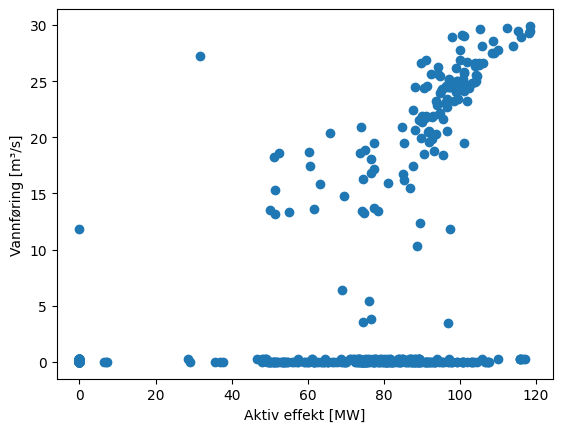

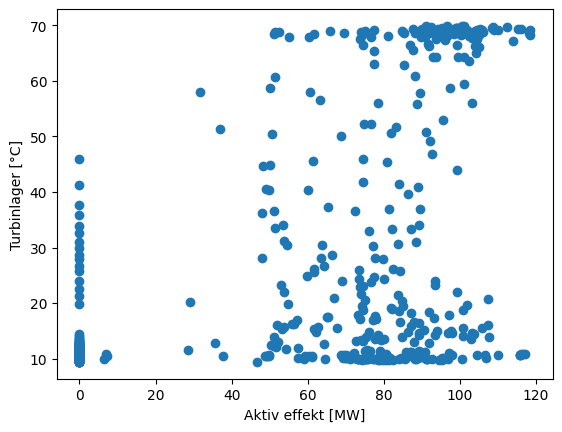

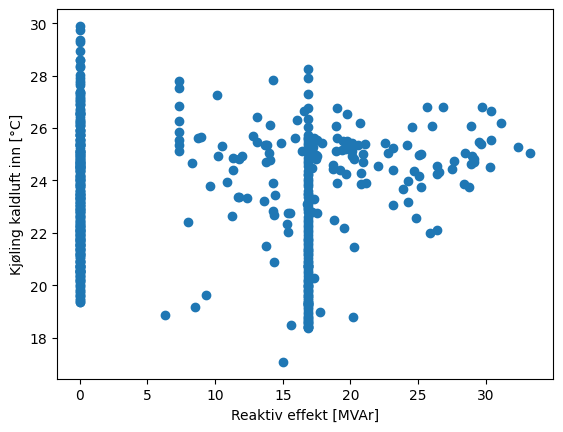

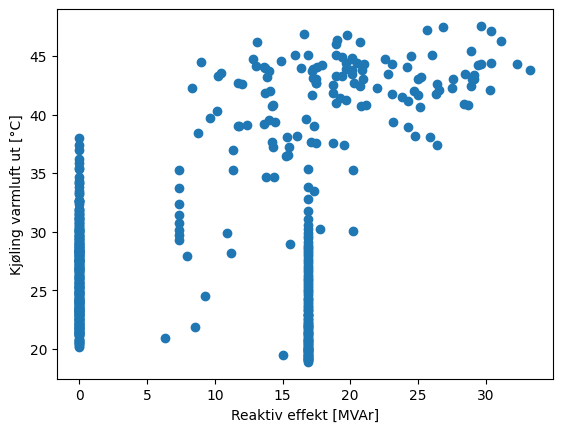

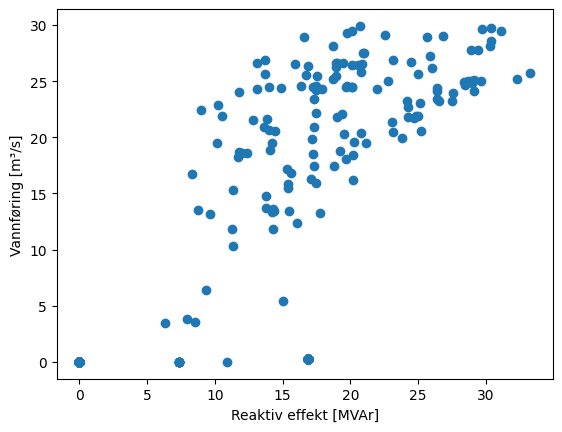

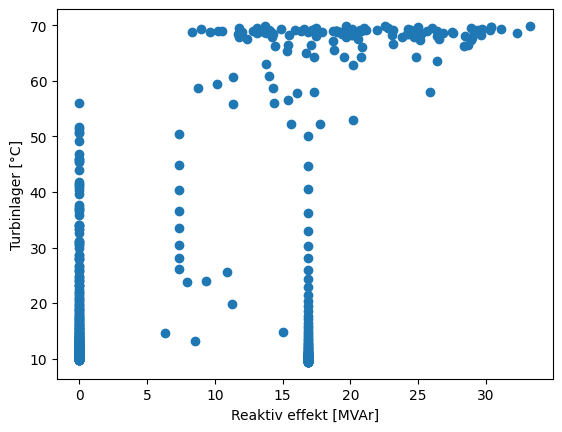

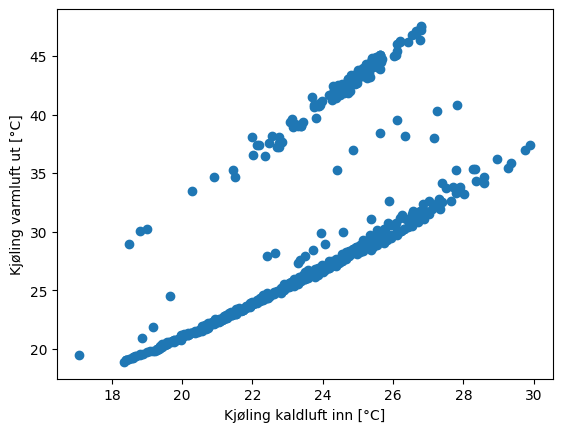

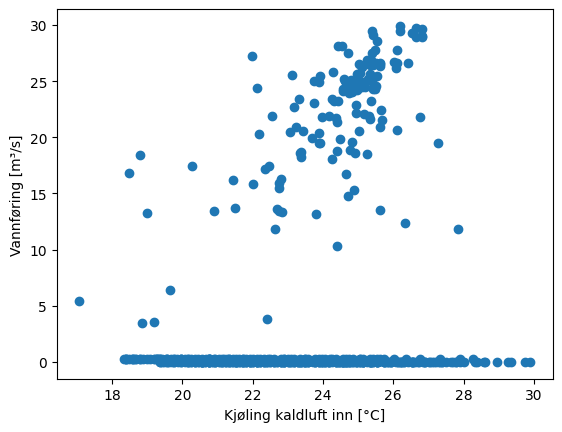

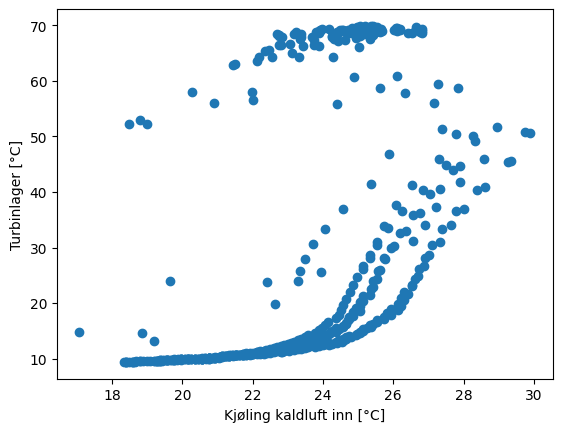

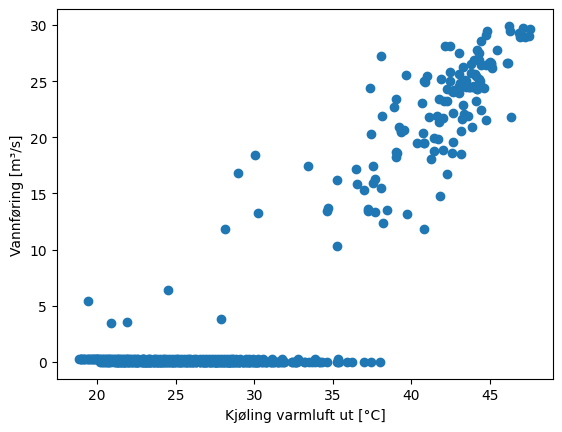

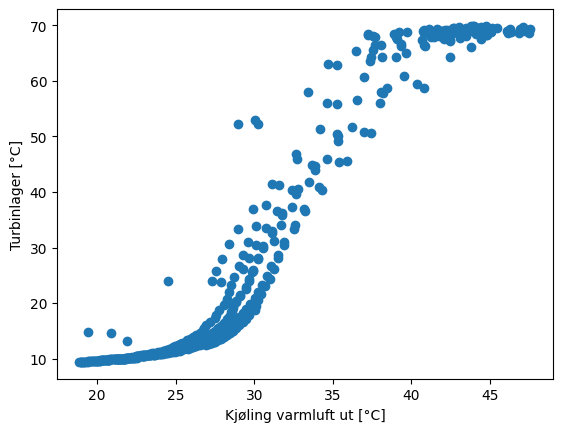

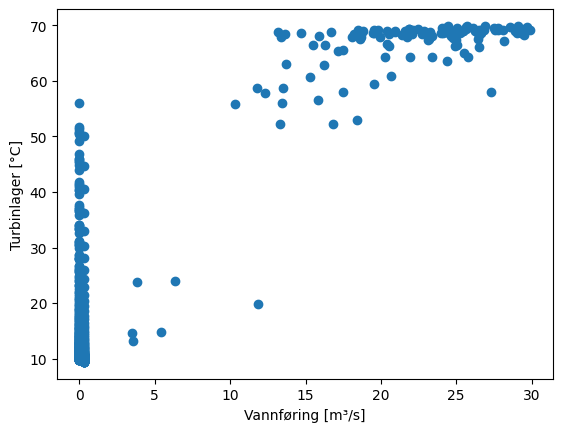

In [33]:

first_100 = data[200:700]
time = first_100['timestamp']
temperatur = first_100['Viklingstemperatur L1 [°C]']
strøm = first_100['Strøm [A]']

# keys = data.keys()
keys = first_100.columns.values.tolist()

for main_key in keys:
    for key in keys:
        if main_key == key:
            continue
        elif keys.index(main_key) > keys.index(key):
            continue
        plt.scatter(first_100[main_key], first_100[key], label=f'{main_key} vs {key}')
        plt.xlabel(main_key)
        plt.ylabel(key)
        plt.show()

#plt.plot(time, temperatur)
#plt.plot(time, strøm)

MSE: 18.84757994771324


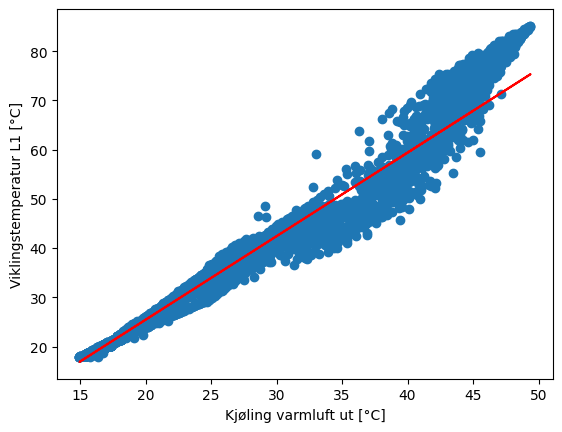

In [34]:
# f1000 = data[:1200]

#plt.scatter(f1000['Kjøling varmluft ut [°C]'], f1000['Viklingstemperatur L1 [°C]'])
#plt.show()

X_train = train.drop(columns=['Viklingstemperatur L1 [°C]'], axis=1)
y_train = train['Viklingstemperatur L1 [°C]']

X_val = validation.drop('Viklingstemperatur L1 [°C]', axis=1)
y_val = validation['Viklingstemperatur L1 [°C]']

X_test = test.drop('Viklingstemperatur L1 [°C]', axis=1)
y_test = test['Viklingstemperatur L1 [°C]']

weights = y_train**2 / y_train.max()

model = LinearRegression()
model.fit(X_train['Kjøling varmluft ut [°C]'].values.reshape(-1, 1), y_train, sample_weight=weights)
predictions = model.predict(X_val['Kjøling varmluft ut [°C]'].values.reshape(-1, 1))

# MSE evaluation
mse = np.mean((predictions - y_val) ** 2)
print(f'MSE: {mse}')

# Plotting
plt.scatter(X_val['Kjøling varmluft ut [°C]'], y_val)
plt.plot(X_val['Kjøling varmluft ut [°C]'], predictions, color='red')
plt.xlabel('Kjøling varmluft ut [°C]')
plt.ylabel('Viklingstemperatur L1 [°C]')
plt.show()

